# 1  자료 정리

In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/pfcvma/econ-python/main/Telco-Customer-Churn.csv"
df_raw = pd.read_csv(url)

In [3]:
df_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 1.1 결측치 처리

In [4]:
# 결측치 처리
df_raw['TotalCharges'] = df_raw['TotalCharges'].replace(" ",np.nan)
df_raw.dropna(inplace=True)
df_raw.drop('customerID',axis=1,inplace=True)

In [5]:
df_raw

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 1.2 타입 변경

In [6]:
col1 = ['MonthlyCharges','TotalCharges']
for i in col1:
    df_raw[i] = df_raw[i].astype(float)

df_raw['tenure'] = df_raw['tenure'].astype(int)
df_raw.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## 1.3 이탈 = 1 / 이탈하지 않음 = 0

In [7]:
df_raw.loc[df_raw.Churn == 'No','Churn'] = 0
df_raw.loc[df_raw.Churn == 'Yes', 'Churn'] = 1
# df_raw = df_raw.replace({'Churn':'Yes'}, 1)
# df_raw = df_raw.replace({'Churn':'No'}, 0) // 같은 코드
df_raw.Churn = df_raw.Churn.astype(int)

### +) monthly charge가 높은 사람들(이탈 방지 핵심 고객) 한정
> monthly charge가 평균보다 높은 사람들을 기준

In [8]:
df_raw = df_raw[df_raw['MonthlyCharges'] > df_raw['MonthlyCharges'].mean()]

# 2  Summary Stats

## 2.1 특성별 빈도수 파악

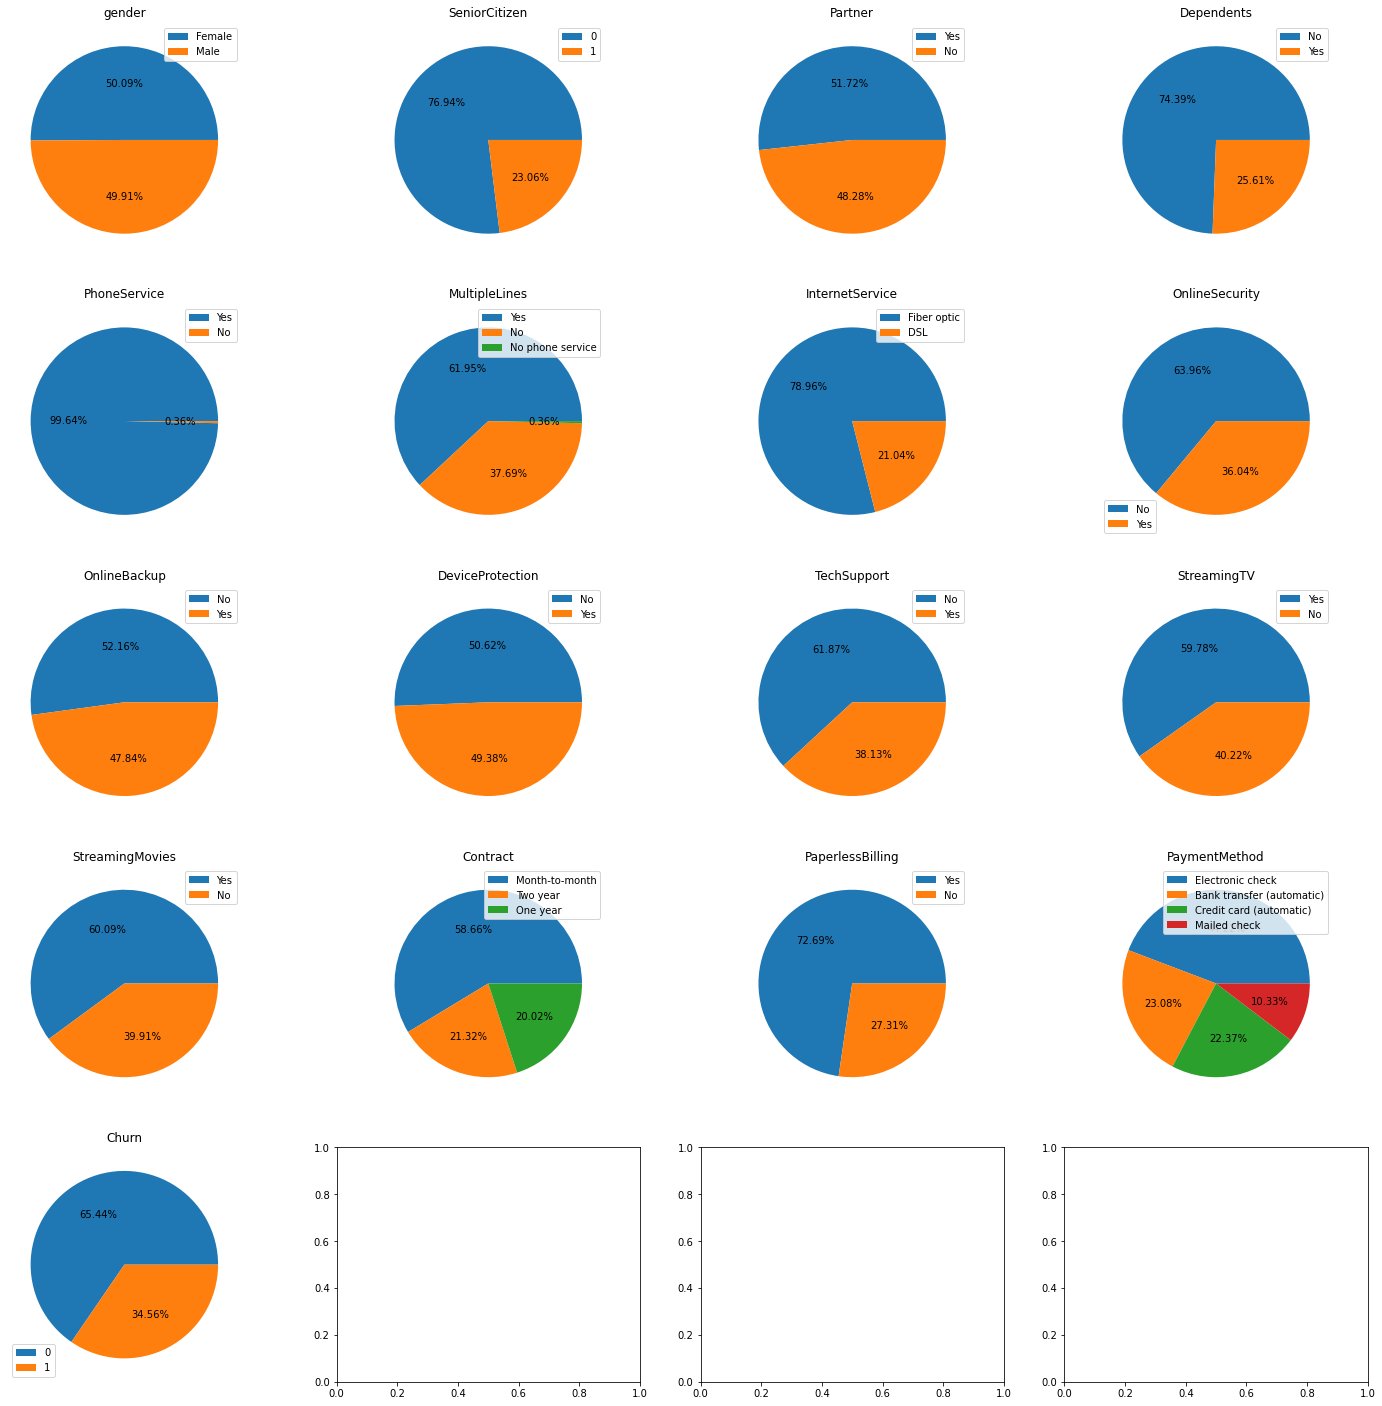

In [9]:
import math

columns = df_raw.columns.tolist()
dellist = ['tenure','MonthlyCharges','TotalCharges']
for i in dellist:
    columns.remove(i)
    
f, axes = plt.subplots(math.ceil(len(columns)/4),4, figsize=(25,25))
for col, ax in zip(columns, axes.ravel()):
        data = df_raw[col].value_counts().values.tolist()
        labels = df_raw[col].value_counts().index.tolist()
        ax.pie(data,autopct='%0.2f%%')
        ax.set_title(col)
        ax.legend(labels,loc='best')

## 2.2 특성별 이탈율 파악

### 2.2.1 카테고리형 (정성변수)

In [10]:
import plotly.graph_objects as go
import plotly.offline as pyoff

def cat_plot(col):
    df_plot = df_raw.groupby(col).Churn.mean().reset_index()

    plot_data = go.Bar(x = df_plot[col],
                       y = df_plot['Churn'],
                       width = 0.5,
                      marker=dict(color=['green','blue','orange','red']))

    plot_layout = go.Layout(xaxis = {'type':'category'},
                           yaxis = {'title':'Churn Rate'},
                           title = col,
                           plot_bgcolor = 'rgb(243,243,243)',
                           paper_bgcolor = 'rgb(243,243,243)')

    fig = go.Figure(data = plot_data,layout = plot_layout)
    pyoff.iplot(fig)

columns.remove('Churn')
for i in columns:
    cat_plot(i)

### 2.2.2 연속형 (정량변수)

In [11]:
def num_plot(cols):
    df_plot = df_raw.groupby(cols).Churn.mean().reset_index()

    plot_data = go.Scatter(x = df_plot[cols],
                          y = df_plot['Churn'],
                          mode = 'markers',
                          marker = dict(size = 7,
                                        line= dict(width=1), 
                                        color = 'blue',
                                       opacity = 0.8 ))

    plot_layout = go.Layout(xaxis = {'title':cols},
                           yaxis = {'title':'Churn Rate'},
                           title = cols + ' based Churn rate',
                           plot_bgcolor = 'rgb(243,243,243)',
                           paper_bgcolor = 'rgb(243,243,243)')

    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

cols = ['tenure','MonthlyCharges','TotalCharges']
for i in cols:
    num_plot(i)

In [12]:
df_dummies = df_raw.drop('Churn',axis=1)
df_dummies = pd.get_dummies(df_dummies, drop_first=True)
df_dummies['Churn'] = df_raw['Churn']

In [13]:
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
5,0,8,99.65,820.50,0,0,0,1,0,1,...,0,1,1,0,0,1,0,1,0,1
6,0,22,89.10,1949.40,1,0,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
8,0,28,104.80,3046.05,0,1,0,1,0,1,...,1,1,1,0,0,1,0,1,0,1
12,0,58,100.35,5681.10,1,1,0,1,0,1,...,0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0,19,78.70,1495.10,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,1,1,0,1,1,0,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


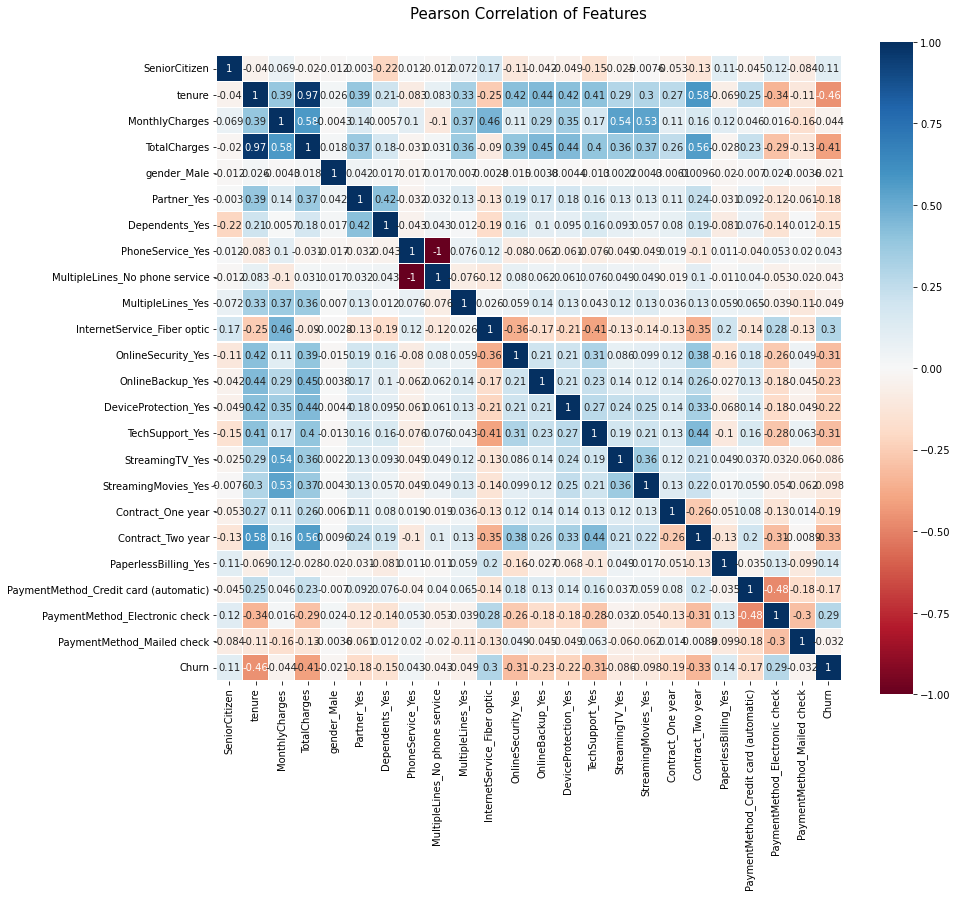

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_dummies.corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

* 선택지가 두 개인 특성(13개) 이탈률이 더 높은 label을 df에 기록함 고령자일수록, 청구서를 직접 받을수록, 온라인보안서비스를 신청하지 않았을수록 이탈률이 높음

* 선택지가 3개 이상(3개) cat_plot을 통해 확인 Internet Service : 광섬유가 가장 이탈률이 높고 서비스를 신청하지 않은게 가장 이탈률이 낮음 Contract : 계약기간이 짧을수록 이탈률이 높음 PaymentMethod : 직접 계산할수록 이탈률이 높음

* 연속형 특성(3개) tenure : 남은기간이 짧을수록 이탈률 높음 MontlyCharges : 이탈률과 선형적 관계없음 TotalCharges : 이탈률과 선형적 관계없음

* 상관행렬을 통한 인사이트 total charges와 montly charges와 tenure 사이에 밀접한 관계가 있음 실제로 확인해본 결과, 식을 발견했음 total charges = montly charges * tenure

#### 변수 선택시 주의할 점

> 상관관계가 1에 가까운 tenure와 TotalCharges 변수의 경우 각별히 주의하여 분석에 임한다. 다중공선성이 우려된다. 둘 중 하나의 변수를 분석에서 제외하는 등 전처리를 수행한다.

# 3  Variation Inflation Factor

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_dummies.drop(columns=['Churn']).values, i) for i in range(df_dummies.drop(columns=['Churn']).shape[1])]
vif["features"] = df_dummies.drop(columns=['Churn']).columns
vif

,VIF Factor,features
0,1.117768,SeniorCitizen
1,51.965082,tenure
2,131.042683,MonthlyCharges
3,63.375817,TotalCharges
4,1.007152,gender_Male
5,1.393346,Partner_Yes
6,1.312351,Dependents_Yes
7,1620.472827,PhoneService_Yes
8,3.488000,MultipleLines_No phone service
9,5.435221,MultipleLines_Yes


In [17]:
high = vif["VIF Factor"] >= 50
highs = vif[high]
highs

,VIF Factor,features
1,51.965082,tenure
2,131.042683,MonthlyCharges
3,63.375817,TotalCharges
7,1620.472827,PhoneService_Yes
10,75.473596,InternetService_Fiber optic


특정 변수들(tenure, MonthlyCharges, TotalCharges, PhoneService_Yes, InternetService_Fiber optic)의 vif 값이 52~1622로 매우 높게 나왔다. 이 중에서 중요한 변수인 tenure, MonthlyCharges, TotalCharges를 제외한 나머지 두 변수를 앞으로의 모형 분석에서 제외한다.

In [18]:
cols = highs['features'].tolist()
cols

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'PhoneService_Yes',
 'InternetService_Fiber optic']

In [19]:
cols = cols[3:]
cols

['PhoneService_Yes', 'InternetService_Fiber optic']

In [20]:
df_vif = df_dummies.drop(columns=cols)
df_vif

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
5,0,8,99.65,820.50,0,0,0,0,1,0,...,0,1,1,0,0,1,0,1,0,1
6,0,22,89.10,1949.40,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
8,0,28,104.80,3046.05,0,1,0,0,1,0,...,1,1,1,0,0,1,0,1,0,1
12,0,58,100.35,5681.10,1,1,0,0,1,0,...,0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0,19,78.70,1495.10,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7038,0,24,84.80,1990.50,1,1,1,0,1,1,...,1,1,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,0,1,0,...,0,1,1,1,0,1,1,0,0,0
7041,1,4,74.40,306.60,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1


In [21]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_vif.drop(columns=['Churn']).values, i) for i in range(df_vif.drop(columns=['Churn']).shape[1])]
vif["features"] = df_vif.drop(columns=['Churn']).columns
vif

,VIF Factor,features
0,1.452583,SeniorCitizen
1,59.328073,tenure
2,21.188293,MonthlyCharges
3,56.108077,TotalCharges
4,2.007024,gender_Male
5,2.881868,Partner_Yes
6,1.761873,Dependents_Yes
7,1.087794,MultipleLines_No phone service
8,3.278098,MultipleLines_Yes
9,2.094496,OnlineSecurity_Yes


> 2개의 변수(PhoneService_Yes, InternetService_Fiber optic) 제거 결과 다중공선성이 상당부분 해결되었다.

# 4  Logistic regression 과 feature selection

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 4.1 dataset: vif 변수 제거 후 (df_vif)

> 모델 성능을 향상시키기 위해 정규화를 수행한다.

> StandardScaler 활용

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
data = df_vif.drop('Churn',axis=1)
target = df_vif.Churn

In [25]:
# train / test 분류
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = seed, stratify=target)

In [26]:
x_list = X_train.columns.tolist()
x_list

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [27]:
# StandardScaler
sc = StandardScaler()
sc.fit(X_train) # X_train의 평균과 표준편차 구함
X_train = sc.transform(X_train) # train data 표준화
X_test = sc.transform(X_test) # test data 표준화

In [28]:
# lasso feature 분석을 위해 dataframe 변환
X_train = pd.DataFrame(data=X_train, columns=x_list)
X_test = pd.DataFrame(data=X_test, columns=x_list)

### 4.2 라쏘 (Lasso) & GridSearchCV

> 선형 회귀에 규제를 적용하는데 Ridge의 대안으로 Lasso가 있다.

> 선형 회귀 모델에서 L1 규제 를 주는 것이 lasso regression

> 선형 회귀 모델에서 L2 규제 를 주는 것이 Ridge regression 

In [29]:
alphas = [0.01, 0.1, 1, 10] # alpha(규제 강도) 하이퍼파라미터 값의 후보 범위
max_iters = [10000, 100000, 1000000] # max_iter 하이퍼파라미터 값의 후보
hyperparams = {'alpha':alphas, 'max_iter':max_iters} # 하이퍼파라미터 후보 딕셔너리

In [30]:
# lasso GridSearch
lasso = Lasso(normalize=True).fit(X_train, y_train)
lasso_model = GridSearchCV(lasso, hyperparams, cv = 10)
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'max_iter': [10000, 100000, 1000000]})

In [31]:
# best parameter: alpha(규제 강도), max_iter
print("best_params_ : ", lasso_model.best_params_)
print("best_score_ : ", lasso_model.best_score_)

best_params_ :  {'alpha': 0.01, 'max_iter': 10000}
best_score_ :  -0.005313486506601506


In [32]:
# 다양한 Scoring 기준 best parameter 도출
scores = ['accuracy', 'precision', 'recall', 'roc_auc', 'average_precision', 'f1_macro', 'f1_micro']

In [33]:
# 모델, hyperparameter, cv값, scoring, parameter 입력 후 GridSearchCV 분석하는 함수
def grid(model, params, cv, score, param):
  best_model = GridSearchCV(model, params, cv=cv, scoring=score).fit(X_train, y_train)
  best_param = best_model.best_estimator_.get_params()[param]
  return best_param

In [34]:
best_list = []
for score in scores:
  best_alpha  = grid(lasso, hyperparams, 10, score, 'alpha')
  best_max_iter = grid(lasso, hyperparams, 10, score, 'max_iter')
  best_list.append([score, best_alpha, best_max_iter])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1348, in _check_set_wise_labels
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred
ValueError: Classification metrics can't handle a mix of binary and continuous targets


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weigh

In [35]:
# 각 scoring 기준 최선의 하이퍼파라미터를 확인합니다.
for i in range(len(best_list)):
  print('-----------------------------------------')
  print('# scoring = "{}"'.format(best_list[i][0]))
  print('Best alpha:', best_list[i][1])
  print('Best max_iter:', best_list[i][2])
  print('-----------------------------------------')
  print()

-----------------------------------------
# scoring = "accuracy"
Best alpha: 0.01
Best max_iter: 10000
-----------------------------------------

-----------------------------------------
# scoring = "precision"
Best alpha: 0.01
Best max_iter: 10000
-----------------------------------------

-----------------------------------------
# scoring = "recall"
Best alpha: 0.01
Best max_iter: 10000
-----------------------------------------

-----------------------------------------
# scoring = "roc_auc"
Best alpha: 0.01
Best max_iter: 10000
-----------------------------------------

-----------------------------------------
# scoring = "average_precision"
Best alpha: 0.01
Best max_iter: 10000
-----------------------------------------

-----------------------------------------
# scoring = "f1_macro"
Best alpha: 0.01
Best max_iter: 10000
-----------------------------------------

-----------------------------------------
# scoring = "f1_micro"
Best alpha: 0.01
Best max_iter: 10000
--------------

> Lasso 모형에서는, 조사해본 모든 scoring에서 alpha가 낮고 max_iter가 작을수록 최적의 hyperparameter였다.

In [36]:
# Best alpha: 0.01 / Best max_iter: 10000 적용
lasso = Lasso(alpha= 0.01, max_iter = 10000).fit(X_train, y_train)

# 회귀계수가 0이 아닌 것을 True, False로 분류한 값
feature_list = lasso.feature_names_in_[lasso.coef_ != 0]

# 분석 제외 feature list 출력
print(feature_list)

['SeniorCitizen' 'tenure' 'MonthlyCharges' 'Dependents_Yes'
 'MultipleLines_Yes' 'OnlineSecurity_Yes' 'OnlineBackup_Yes'
 'DeviceProtection_Yes' 'TechSupport_Yes' 'Contract_One year'
 'Contract_Two year' 'PaperlessBilling_Yes'
 'PaymentMethod_Electronic check']


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
lasso_y_hat = lasso.predict(X_test)

In [39]:
# scores of Lasso (alpha = 0.01)
print("r2_score of Lasso: ",r2_score(y_test,lasso_y_hat).round(2))
print("mean_absolute_error of Lasso: ",mean_absolute_error(y_test,lasso_y_hat).round(2))
print("mean_squared_error of Lasso: ",mean_squared_error(y_test,lasso_y_hat).round(2))

r2_score of Lasso:  0.24
mean_absolute_error of Lasso:  0.35
mean_squared_error of Lasso:  0.17


In [40]:
# 규제 강도 증가: alpha=0.1
lasso = Lasso(alpha= 0.1, max_iter = best_max_iter).fit(X_train, y_train)
feature_list = lasso.feature_names_in_[lasso.coef_ != 0]

# 규제 강도 증가시 분석 제외 feature list 출력
print(feature_list)

['tenure' 'TechSupport_Yes']


In [41]:
lasso_y_hat = lasso.predict(X_test)

In [42]:
# scores of Lasso (alpha = 0.1)
print("r2_score of Lasso: ",r2_score(y_test,lasso_y_hat).round(2))
print("mean_absolute_error of Lasso: ",mean_absolute_error(y_test,lasso_y_hat).round(2))
print("mean_squared_error of Lasso: ",mean_squared_error(y_test,lasso_y_hat).round(2))

r2_score of Lasso:  0.15
mean_absolute_error of Lasso:  0.4
mean_squared_error of Lasso:  0.19


> alpha 값을 높일수록 분석에 제외되는 feature의 수가 줄어든다.

## 4.3 Scoring 종류

1. 정확도(Accuracy)

2. 정밀도 (Precision)
- Positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율

- 중요 사례: 스팸 분류 (스팸으로 분류한 메일 중에서 중요 메일이 있는 경우

3. 재현율 (Recall), 민감도
- 실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율

- 중요 사례: 암 진단 (암 환자를 건강으로 분류하는 경우)
- TPR (True Positive Rate)

4. F1 Score
- 재현율과 정밀도의 균형을 나타내는 수치

> 학습 과정에서 학습 데이터와 테스트 데이터에 대해서 Accuracy, Precision, Recall, F1 Score를 계산하여 평가하였습니다.
> Accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

> $Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

> 이탈(Churn) = 1(Yes) / 이탈하지 않음 = 0(No)

> 현재 데이터는 `이탈하지 않는다(0)` 는 데이터가 `이탈한다(1)` 데이터에 비해 월등히 많은 상황입니다. (65.44% vs 34.56%)
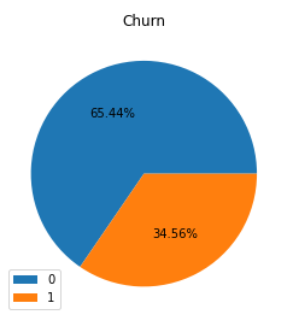

> 이런 경우, `이탈하지 않는다(0)`만을 정확히 예측해도 높은 accuracy 값을 가질 수 있습니다.  

> 그렇기에 이번 실습에서는 또 다른 성능 지표인 recall 값 또한 살펴봐야 합니다. recall 방식은 `이탈한다(1)` 대비 `이탈하지 않는다(0)`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충합니다.

> 따라서 이번 분석에서는 **"accuracy"** 및 **"recall"** 방식의 scoring이 적합합니다.

## 4.4 Confusion Matrix

In [43]:
# 로지스틱 회귀
log_model = LogisticRegression().fit(X_train,y_train)

In [44]:
penalty = ['l1', 'l2'] # 페널티(penalty) 하이퍼파라미터 값의 후보
C = np.logspace(0, 4, 10) # 규제 하이퍼파라미터 값의 후보 범위
hyperparameters = dict(C=C, penalty=penalty) # 하이퍼파라미터 후보 딕셔너리

In [45]:
# 다양한 Scoring 기준 best parameter 도출
best_list = []
for score in scores:
  best_penalty = grid(log_model, hyperparameters, 10, score, 'penalty')
  best_C = grid(log_model, hyperparameters, 10, score, 'C')
  best_list.append([score, best_penalty, best_C])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

In [46]:
# 각 scoring 기준 최선의 하이퍼파라미터를 확인합니다.
for i in range(len(best_list)):
  print('-----------------------------------------')
  print('# scoring = "{}"'.format(best_list[i][0]))
  print('Best penalty:', best_list[i][1])
  print('Best C:', best_list[i][2])
  print('-----------------------------------------')
  print()

-----------------------------------------
# scoring = "accuracy"
Best penalty: l2
Best C: 2.7825594022071245
-----------------------------------------

-----------------------------------------
# scoring = "precision"
Best penalty: l2
Best C: 2.7825594022071245
-----------------------------------------

-----------------------------------------
# scoring = "recall"
Best penalty: l2
Best C: 1.0
-----------------------------------------

-----------------------------------------
# scoring = "roc_auc"
Best penalty: l2
Best C: 1291.5496650148827
-----------------------------------------

-----------------------------------------
# scoring = "average_precision"
Best penalty: l2
Best C: 7.742636826811269
-----------------------------------------

-----------------------------------------
# scoring = "f1_macro"
Best penalty: l2
Best C: 2.7825594022071245
-----------------------------------------

-----------------------------------------
# scoring = "f1_micro"
Best penalty: l2
Best C: 2.78255

> 모든 경우에서 best penalty = L2

> 하지만 우리 분석에서는 L1 penalty를 사용해야 하므로, penalty parameter 고정

In [47]:
# penalty: L1 고정
# 로지스틱 회귀
log_model = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train,y_train)

In [48]:
C = np.logspace(0, 4, 10) # 규제 하이퍼파라미터 값의 후보 범위
hyperparameters = dict(C=C) # 하이퍼파라미터 후보 딕셔너리

In [49]:
best_list = []
for score in scores:
  best_C = grid(log_model, hyperparameters, 10, score, 'C')
  best_list.append([score, best_C.round(2)])

In [50]:
# 각 scoring 기준 최선의 하이퍼파라미터를 확인합니다.
for i in range(len(best_list)):
  print('-----------------------------------------')
  print('# scoring = "{}"'.format(best_list[i][0]))
  print('Best C:', best_list[i][1])
  print('-----------------------------------------')
  print()

-----------------------------------------
# scoring = "accuracy"
Best C: 1.0
-----------------------------------------

-----------------------------------------
# scoring = "precision"
Best C: 1.0
-----------------------------------------

-----------------------------------------
# scoring = "recall"
Best C: 1.0
-----------------------------------------

-----------------------------------------
# scoring = "roc_auc"
Best C: 59.95
-----------------------------------------

-----------------------------------------
# scoring = "average_precision"
Best C: 7.74
-----------------------------------------

-----------------------------------------
# scoring = "f1_macro"
Best C: 1.0
-----------------------------------------

-----------------------------------------
# scoring = "f1_micro"
Best C: 1.0
-----------------------------------------



> scoring = "accuracy", "recall"에서 **Best C = 1**

> 따라서 C=1로 고정하고 LogisticRegression 수행

In [51]:
# Best C = 1
log_model = LogisticRegression(penalty='l1', solver='liblinear', C=1).fit(X_train,y_train)
pred = log_model.predict(X_test)

In [52]:
# Confusion Matrix of Logistic Regression
conf_mat_logistic = confusion_matrix(y_true = y_test, y_pred = pred)
print(conf_mat_logistic)

[[426  88]
 [ 99 172]]


In [53]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표 출력
print('Accuracy : %.2f' % accuracy_score(y_test, pred))
print('Precision : %.3f' % precision_score(y_test, pred))
print('Recall : %.3f' % recall_score(y_test, pred))
print('F1 : %.3f' % f1_score(y_test, pred))

Accuracy : 0.76
Precision : 0.662
Recall : 0.635
F1 : 0.648


# 5  Naïve Bayes

## 5.1  Discrete tenure

> MultinomialNB는 음수값을 받을 수 없으므로, MinMaxScaler 사용하여 Data Scaling

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
data = df_vif.drop('Churn',axis=1)
target = df_vif.Churn

In [57]:
# train / test 분류
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = seed, stratify=target)

In [58]:
x_list = X_train.columns.tolist()
x_list

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [59]:
# MinMaxScaler 활용
# '0~1' 사이의 범위(range)로 데이터를 표준화
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [60]:
# dataframe 변환
X_train = pd.DataFrame(data=X_train, columns=x_list)
X_test = pd.DataFrame(data=X_test, columns=x_list)

In [61]:
mn = MultinomialNB(alpha=0.8).fit(X_train, y_train)

In [62]:
pred_mn = mn.predict(X_test)

In [63]:
# train_score & test_score
train_score = mn.score(X_train, y_train)
test_score = mn.score(X_test, y_test)
display(train_score.round(2), test_score.round(2))

0.74

0.73

In [64]:
conf_mat = confusion_matrix(y_test, pred_mn)
print(conf_mat)

[[403 111]
 [ 99 172]]


In [65]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표 출력
print('Accuracy : %.2f' % accuracy_score(y_test, pred_mn))
print('Precision : %.3f' % precision_score(y_test, pred_mn))
print('Recall : %.3f' % recall_score(y_test, pred_mn))
print('F1 : %.3f' % f1_score(y_test, pred_mn))

Accuracy : 0.73
Precision : 0.608
Recall : 0.635
F1 : 0.621


## 5.2  Grouping tenure

In [66]:
max(df_dummies['tenure'])

72

In [67]:
min(df_dummies['tenure'])

1

np.digitize() 가 [포함, 미포함) 인 반면에 pd.cut()은 (미포함, 포함]으로 정반대입니다. 


np.digitize() 가 bin 안의 처음 숫자보다 작거나 같은 값에 자동으로 '1'의 정수를 부여하고, bin 안의 마지막 숫자보다 큰 값에 대해서는 bin 순서에 따라 자동으로 digitze 정수를 부여하는 반면에, pd.cut()은 bin 구간에 없는 값에 대해서는 'NaN'을 반환하고 bin 구간 내 값에 대해서는 사용자가 labels=['a', 'b'] 처럼 입력해준 label 값을 부여해줍니다.

따라서 grouping의 편의를 위해 자동으로 정수를 부여하는 np.digitize()를 선택합니다.

month의 최솟값이 1부터 시작하므로, 6개월 단위 discretize를 위해 범위는 6의 배수+1로 설정합니다.

### 5.2.1 'tenure' discretize

In [68]:
# 'tenure' 변수를 6개월 단위로 discretize
print("* Tenure 변수 discretize 값 *")
for i in range(1,13):
  print(6*i, '이하', i-1)

* Tenure 변수 discretize 값 *
6 이하 0
12 이하 1
18 이하 2
24 이하 3
30 이하 4
36 이하 5
42 이하 6
48 이하 7
54 이하 8
60 이하 9
66 이하 10
72 이하 11


In [69]:
bins = [6*i+1 for i in range(1,13)]
bins

[7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73]

In [70]:
# returns numpy array
np.digitize(df_vif['tenure'], bins)

df_vif['tenure_dig'] = np.digitize(df_vif['tenure'], bins)
df_vif

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,tenure_dig
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
5,0,8,99.65,820.50,0,0,0,0,1,0,...,1,1,0,0,1,0,1,0,1,1
6,0,22,89.10,1949.40,1,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,3
8,0,28,104.80,3046.05,0,1,0,0,1,0,...,1,1,0,0,1,0,1,0,1,4
12,0,58,100.35,5681.10,1,1,0,0,1,0,...,1,1,1,0,0,1,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0,19,78.70,1495.10,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,3
7038,0,24,84.80,1990.50,1,1,1,0,1,1,...,1,1,1,0,1,0,0,1,0,3
7039,0,72,103.20,7362.90,0,1,1,0,1,0,...,1,1,1,0,1,1,0,0,0,11
7041,1,4,74.40,306.60,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0


In [71]:
is_tenure = df_vif['tenure'] == 6

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
tenure = df_vif[is_tenure]

# 결과를 출력합니다.
tenure.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,tenure_dig
191,0,6,91.00,531.00,1,1,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
293,1,6,89.35,567.80,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
508,0,6,80.50,502.85,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
804,0,6,85.35,489.45,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
882,0,6,83.90,497.55,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


> tenure == 6 인 데이터값의 digitize가 모두 0으로 분류된 것을 확인. (끝점 미포함)

> 따라서 tenure 칼럼 대체


In [72]:
df_vif['tenure'] = df_vif['tenure_dig']
df_vif = df_vif.drop('tenure_dig',axis=1)
df_vif

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
4,0,0,70.70,151.65,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
5,0,1,99.65,820.50,0,0,0,0,1,0,...,0,1,1,0,0,1,0,1,0,1
6,0,3,89.10,1949.40,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
8,0,4,104.80,3046.05,0,1,0,0,1,0,...,1,1,1,0,0,1,0,1,0,1
12,0,9,100.35,5681.10,1,1,0,0,1,0,...,0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0,3,78.70,1495.10,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7038,0,3,84.80,1990.50,1,1,1,0,1,1,...,1,1,1,1,0,1,0,0,1,0
7039,0,11,103.20,7362.90,0,1,1,0,1,0,...,0,1,1,1,0,1,1,0,0,0
7041,1,0,74.40,306.60,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1


### 5.2.2 VIF <- 'tenure' discretize 반영

In [73]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_vif.drop(columns=['Churn']).values, i) for i in range(df_vif.drop(columns=['Churn']).shape[1])]
vif["features"] = df_vif.drop(columns=['Churn']).columns
vif

,VIF Factor,features
0,1.452608,SeniorCitizen
1,52.130435,tenure
2,21.318679,MonthlyCharges
3,56.779005,TotalCharges
4,2.004453,gender_Male
5,2.875451,Partner_Yes
6,1.761636,Dependents_Yes
7,1.078355,MultipleLines_No phone service
8,3.276350,MultipleLines_Yes
9,2.090153,OnlineSecurity_Yes


> VIF 수치가 개선되었다. (다중공선성 완화)

### 5.2.3 Discretized data 활용 분석

In [74]:
# 'tenure' discretizing 이후 분석
data = df_vif.drop('Churn',axis=1)
target = df_vif.Churn

In [75]:
# train / test 분류
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = seed, stratify=target)

In [76]:
x_list = X_train.columns.tolist()
x_list

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [77]:
# MinMaxScaler 활용
# '0~1' 사이의 범위(range)로 데이터를 표준화
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [78]:
# dataframe 변환
X_train = pd.DataFrame(data=X_train, columns=x_list)
X_test = pd.DataFrame(data=X_test, columns=x_list)

In [79]:
mn = MultinomialNB(alpha=0.8).fit(X_train, y_train)

In [80]:
pred_mn = mn.predict(X_test)

In [81]:
# train_score & test_score
train_score = mn.score(X_train, y_train)
test_score = mn.score(X_test, y_test)
display(train_score.round(2), test_score.round(2))

0.74

0.73

In [82]:
conf_mat = confusion_matrix(y_test, pred_mn)
print(conf_mat)

[[402 112]
 [ 97 174]]


In [83]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표 출력
print('Accuracy : %.2f' % accuracy_score(y_test, pred_mn))
print('Precision : %.3f' % precision_score(y_test, pred_mn))
print('Recall : %.3f' % recall_score(y_test, pred_mn))
print('F1 : %.3f' % f1_score(y_test, pred_mn))

Accuracy : 0.73
Precision : 0.608
Recall : 0.642
F1 : 0.625


#### * Monthly vs Discretized(6 months) 차이?

> 1. Recall, F1 score 소폭 개선 -> 분류 성능 소폭 개선
> 2. MinMaxScaler 적용으로 인해 두 모델 간 뚜렷한 차이는 나타나지 않았음.

# 6  자료 저장

> 다중공선성 완화(**VIF**) + **'tenure'** discretizing 적용 + **MinMaxScaling** 완료

In [84]:
df1 = pd.concat([X_test, X_train])
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.090909,0.477737,0.110550,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.000000,0.725417,0.857550,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.363636,0.766234,0.358395,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.000000,0.648423,0.043442,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.000000,0.554731,0.041065,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,0.0,1.000000,0.112349,0.569258,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3132,0.0,0.181818,0.087279,0.116396,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3133,1.0,1.000000,0.951718,0.967515,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3134,1.0,0.545455,0.368617,0.403056,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [85]:
df2 = pd.concat([y_test, y_train])
df2 = pd.DataFrame(df2)
df2

,Churn
2319,0
4395,1
4908,1
1401,1
4618,0
...,...
565,0
149,0
464,0
1645,1


In [86]:
df1 = df1.reset_index()
df2 = df2.reset_index()
to_pickle = pd.concat([df1, df2], axis=1).drop('index',axis=1)

In [87]:
to_pickle

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.0,0.090909,0.477737,0.110550,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.0,1.000000,0.725417,0.857550,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,1.0,0.363636,0.766234,0.358395,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,1.0,0.000000,0.648423,0.043442,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
4,1.0,0.000000,0.554731,0.041065,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,0.0,1.000000,0.112349,0.569258,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0
3917,0.0,0.181818,0.087279,0.116396,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3918,1.0,1.000000,0.951718,0.967515,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3919,1.0,0.545455,0.368617,0.403056,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [88]:
to_pickle.to_csv('to_pickle.csv')

> 깃헙 레포지토리 업로드 완료.

> https://github.com/pfcvma/econ-python

# 7  SVM

In [89]:
import sklearn.svm as svm

In [90]:
data = to_pickle.drop('Churn',axis=1)
target = to_pickle.Churn

In [91]:
# train / test split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = seed, stratify=target)

## 7.1 SVM, kernel = 'linear'

In [92]:
# SVM, kernel = 'linear'로 선형분리 진행
svm_clf = svm.SVC(kernel = 'linear', degree=2, random_state=42).fit(X_train, y_train)

In [93]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.01, 0.1, 1, 10, 20, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 10)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(degree=2, kernel='linear', random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 20, 50, 100]})

In [94]:
print("Best C: ",grid_svm.best_estimator_.get_params()['C'])
print("Best gamma: ",grid_svm.best_estimator_.get_params()['gamma'])

Best C:  10
Best gamma:  0.01


In [95]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']

# mean_test_score 기준 정렬
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
30,10.000,1.00,0.765290
34,10.000,100.00,0.765290
28,10.000,0.01,0.765290
29,10.000,0.10,0.765290
31,10.000,10.00,0.765290
32,10.000,20.00,0.765290
33,10.000,50.00,0.765290
41,100.000,100.00,0.765289
35,100.000,0.01,0.765289
36,100.000,0.10,0.765289


>  SVM, kernel = 'linear'로 선형분리, mean_test_score가 높은 순서대로 정렬

>parameter(C = 10, gamma=0.01~100)일 때 가장 score가 높음

> **gamma는 거의 영향 X. gamma보다 C에 많은 영향을 받음.**

In [96]:
# best parameter 적용 (C=10, gamma=0.01)
svm_clf = svm.SVC(C=10, gamma=0.01, kernel = 'linear', degree=2, random_state=42).fit(X_train, y_train)
pred_svm = svm_clf.predict(X_test)

In [97]:
cfm = confusion_matrix(y_test, pred_svm)
print(cfm)

[[601 169]
 [134 273]]


In [98]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표 출력
print('Accuracy : %.2f' % accuracy_score(y_test, pred_svm))
print('Precision : %.3f' % precision_score(y_test, pred_svm))
print('Recall : %.3f' % recall_score(y_test, pred_svm))
print('F1 : %.3f' % f1_score(y_test, pred_svm))

Accuracy : 0.74
Precision : 0.618
Recall : 0.671
F1 : 0.643


## 7.2 SVM, kernel = 'rbf'

In [99]:
# SVM, kernel = 'rbf'로 비선형분리 진행
svm_clf = svm.SVC(kernel = 'rbf', degree=2, random_state=42).fit(X_train, y_train)

In [100]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.01, 0.1, 1, 10, 20, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 10)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(degree=2, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 20, 50, 100]})

In [101]:
print("Best C: ",grid_svm.best_estimator_.get_params()['C'])
print("Best gamma: ",grid_svm.best_estimator_.get_params()['gamma'])

Best C:  10
Best gamma:  0.01


In [102]:
result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']

# mean_test_score 기준 정렬
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
28,10.000,0.01,0.766752
22,1.000,0.10,0.763834
35,100.000,0.01,0.761658
15,0.100,0.10,0.759831
29,10.000,0.10,0.759827
21,1.000,0.01,0.756908
23,1.000,1.00,0.729943
36,100.000,0.10,0.727382
30,10.000,1.00,0.720461
37,100.000,1.00,0.720088


> SVM, kernel = 'rbf'로 비선형분리, mean_test_score가 높은 순서대로 정렬

>parameter(C = 10, gamma=0.01)일 때 가장 score가 높음. **gamma, C 모두 영향 미침.**

In [103]:
# best parameter 적용
svm_clf = svm.SVC(C=10, gamma=0.01, kernel = 'rbf', degree=2, random_state=42).fit(X_train, y_train)
pred_svm = svm_clf.predict(X_test)

In [104]:
cfm = confusion_matrix(y_test, pred_svm)
print(cfm)

[[622 148]
 [142 265]]


In [105]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가 지표 출력
print('Accuracy : %.2f' % accuracy_score(y_test, pred_svm))
print('Precision : %.3f' % precision_score(y_test, pred_svm))
print('Recall : %.3f' % recall_score(y_test, pred_svm))
print('F1 : %.3f' % f1_score(y_test, pred_svm))

Accuracy : 0.75
Precision : 0.642
Recall : 0.651
F1 : 0.646


# 8  BONUS

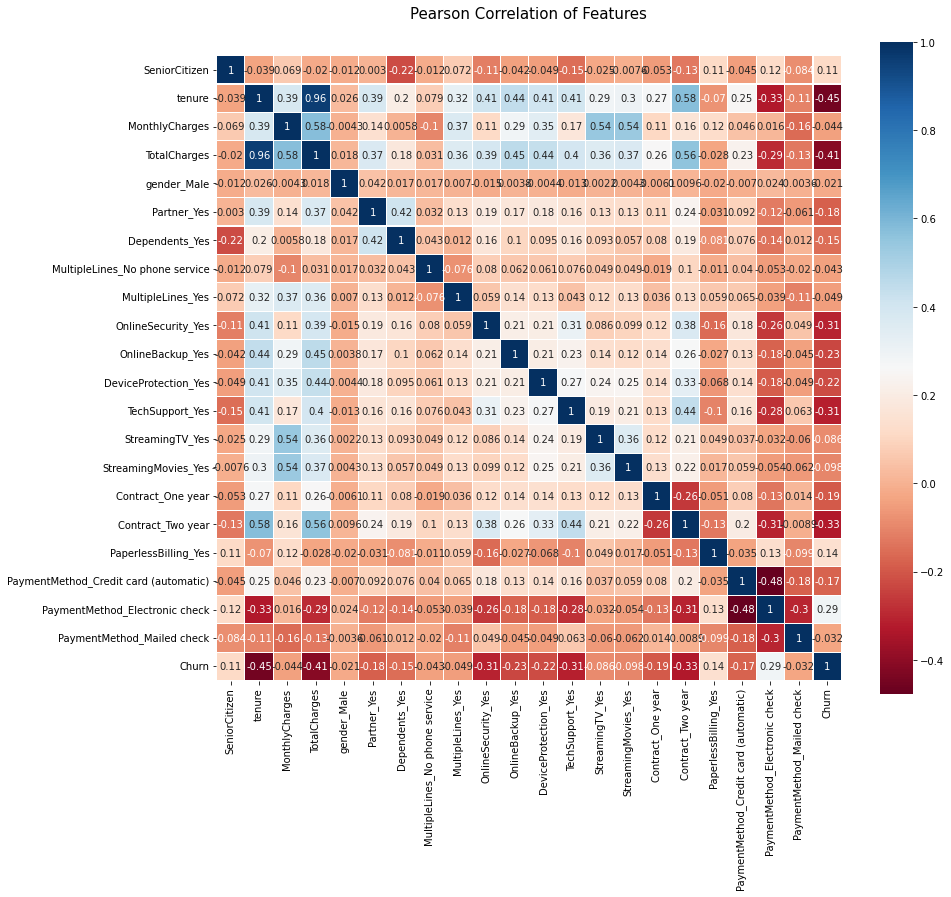

In [106]:
# heatmap으로 표현
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(to_pickle.corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

In [107]:
# 상관계수 절댓값 변환
pic_corr = to_pickle.corr().abs()
pic_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.039163,0.068920,0.020088,0.012344,0.002954,0.218476,0.012464,0.072318,0.114483,...,0.152941,0.025213,0.007646,0.052939,0.126763,0.114048,0.045331,0.122189,0.084309,0.111540
tenure,0.039163,1.000000,0.385448,0.964697,0.026341,0.387455,0.204780,0.079289,0.324332,0.414825,...,0.405126,0.288829,0.298062,0.270981,0.577276,0.069857,0.250941,0.333436,0.107923,0.451996
MonthlyCharges,0.068920,0.385448,1.000000,0.575093,0.004303,0.143540,0.005764,0.101952,0.366116,0.113740,...,0.173172,0.539817,0.535027,0.105206,0.162590,0.123615,0.046368,0.016235,0.157293,0.044033
TotalCharges,0.020088,0.964697,0.575093,1.000000,0.017866,0.373090,0.177029,0.031047,0.364194,0.391147,...,0.397437,0.363388,0.371122,0.257280,0.557413,0.028400,0.231168,0.290928,0.129839,0.413276
gender_Male,0.012344,0.026341,0.004303,0.017866,1.000000,0.041657,0.017409,0.017210,0.007006,0.015127,...,0.012776,0.002177,0.004274,0.006118,0.009647,0.019983,0.006998,0.024184,0.003584,0.020691
Partner_Yes,0.002954,0.387455,0.143540,0.373090,0.041657,1.000000,0.415964,0.032164,0.131070,0.189409,...,0.157372,0.130782,0.128648,0.105845,0.236273,0.030999,0.092353,0.124190,0.061164,0.183335
Dependents_Yes,0.218476,0.204780,0.005764,0.177029,0.017409,0.415964,1.000000,0.043254,0.012080,0.163324,...,0.157838,0.092717,0.056951,0.080309,0.189659,0.080998,0.076338,0.142367,0.012090,0.151084
MultipleLines_No phone service,0.012464,0.079289,0.101952,0.031047,0.017210,0.032164,0.043254,1.000000,0.076379,0.079751,...,0.076255,0.049100,0.048788,0.019264,0.104552,0.011285,0.039696,0.053302,0.020316,0.043499
MultipleLines_Yes,0.072318,0.324332,0.366116,0.364194,0.007006,0.131070,0.012080,0.076379,1.000000,0.058719,...,0.043120,0.119906,0.126028,0.036368,0.128395,0.059498,0.065188,0.039331,0.110278,0.049046
OnlineSecurity_Yes,0.114483,0.414825,0.113740,0.391147,0.015127,0.189409,0.163324,0.079751,0.058719,1.000000,...,0.310884,0.085908,0.098682,0.123607,0.375776,0.156232,0.177143,0.264054,0.048962,0.307515


In [108]:
is_corr = pic_corr.mean(axis=1) >= 0.25
is_corr

SeniorCitizen                            False
tenure                                    True
MonthlyCharges                           False
TotalCharges                              True
gender_Male                              False
Partner_Yes                              False
Dependents_Yes                           False
MultipleLines_No phone service           False
MultipleLines_Yes                        False
OnlineSecurity_Yes                       False
OnlineBackup_Yes                         False
DeviceProtection_Yes                     False
TechSupport_Yes                          False
StreamingTV_Yes                          False
StreamingMovies_Yes                      False
Contract_One year                        False
Contract_Two year                         True
PaperlessBilling_Yes                     False
PaymentMethod_Credit card (automatic)    False
PaymentMethod_Electronic check           False
PaymentMethod_Mailed check               False
Churn        

상관계수의 절댓값 평균이 0.25 이상인 변수 3가지(TotalCharges, Contract_Two year, tenure) 도출.

이 변수들을 제외한 dataframe을 생성한다.

In [109]:
# 조건식 반대로
is_corr = pic_corr.mean(axis=1) < 0.25
is_corr

SeniorCitizen                             True
tenure                                   False
MonthlyCharges                            True
TotalCharges                             False
gender_Male                               True
Partner_Yes                               True
Dependents_Yes                            True
MultipleLines_No phone service            True
MultipleLines_Yes                         True
OnlineSecurity_Yes                        True
OnlineBackup_Yes                          True
DeviceProtection_Yes                      True
TechSupport_Yes                           True
StreamingTV_Yes                           True
StreamingMovies_Yes                       True
Contract_One year                         True
Contract_Two year                        False
PaperlessBilling_Yes                      True
PaymentMethod_Credit card (automatic)     True
PaymentMethod_Electronic check            True
PaymentMethod_Mailed check                True
Churn        

In [110]:
# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
corr = pic_corr[is_corr]
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.039163,0.068920,0.020088,0.012344,0.002954,0.218476,0.012464,0.072318,0.114483,...,0.152941,0.025213,0.007646,0.052939,0.126763,0.114048,0.045331,0.122189,0.084309,0.111540
MonthlyCharges,0.068920,0.385448,1.000000,0.575093,0.004303,0.143540,0.005764,0.101952,0.366116,0.113740,...,0.173172,0.539817,0.535027,0.105206,0.162590,0.123615,0.046368,0.016235,0.157293,0.044033
gender_Male,0.012344,0.026341,0.004303,0.017866,1.000000,0.041657,0.017409,0.017210,0.007006,0.015127,...,0.012776,0.002177,0.004274,0.006118,0.009647,0.019983,0.006998,0.024184,0.003584,0.020691
Partner_Yes,0.002954,0.387455,0.143540,0.373090,0.041657,1.000000,0.415964,0.032164,0.131070,0.189409,...,0.157372,0.130782,0.128648,0.105845,0.236273,0.030999,0.092353,0.124190,0.061164,0.183335
Dependents_Yes,0.218476,0.204780,0.005764,0.177029,0.017409,0.415964,1.000000,0.043254,0.012080,0.163324,...,0.157838,0.092717,0.056951,0.080309,0.189659,0.080998,0.076338,0.142367,0.012090,0.151084
MultipleLines_No phone service,0.012464,0.079289,0.101952,0.031047,0.017210,0.032164,0.043254,1.000000,0.076379,0.079751,...,0.076255,0.049100,0.048788,0.019264,0.104552,0.011285,0.039696,0.053302,0.020316,0.043499
MultipleLines_Yes,0.072318,0.324332,0.366116,0.364194,0.007006,0.131070,0.012080,0.076379,1.000000,0.058719,...,0.043120,0.119906,0.126028,0.036368,0.128395,0.059498,0.065188,0.039331,0.110278,0.049046
OnlineSecurity_Yes,0.114483,0.414825,0.113740,0.391147,0.015127,0.189409,0.163324,0.079751,0.058719,1.000000,...,0.310884,0.085908,0.098682,0.123607,0.375776,0.156232,0.177143,0.264054,0.048962,0.307515
OnlineBackup_Yes,0.041842,0.440365,0.288115,0.452783,0.003752,0.173388,0.104854,0.062499,0.137593,0.210502,...,0.228856,0.136935,0.123825,0.139604,0.263038,0.027019,0.131588,0.176434,0.044912,0.232215
DeviceProtection_Yes,0.048871,0.410653,0.346521,0.438352,0.004358,0.184436,0.094990,0.060614,0.126792,0.206475,...,0.268701,0.242028,0.245537,0.144568,0.334064,0.067766,0.139531,0.184022,0.048557,0.223151


In [111]:
corr_list = is_corr.tolist()
corr_list

[True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True]

In [112]:
bonus_list = []
for i in range(len(corr_list)):
  if corr_list[i]==True:
    bonus_list.append(i)
bonus_list

[0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21]

In [113]:
corr = corr.iloc[:, bonus_list]
corr

,SeniorCitizen,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.068920,0.012344,0.002954,0.218476,0.012464,0.072318,0.114483,0.041842,0.048871,0.152941,0.025213,0.007646,0.052939,0.114048,0.045331,0.122189,0.084309,0.111540
MonthlyCharges,0.068920,1.000000,0.004303,0.143540,0.005764,0.101952,0.366116,0.113740,0.288115,0.346521,0.173172,0.539817,0.535027,0.105206,0.123615,0.046368,0.016235,0.157293,0.044033
gender_Male,0.012344,0.004303,1.000000,0.041657,0.017409,0.017210,0.007006,0.015127,0.003752,0.004358,0.012776,0.002177,0.004274,0.006118,0.019983,0.006998,0.024184,0.003584,0.020691
Partner_Yes,0.002954,0.143540,0.041657,1.000000,0.415964,0.032164,0.131070,0.189409,0.173388,0.184436,0.157372,0.130782,0.128648,0.105845,0.030999,0.092353,0.124190,0.061164,0.183335
Dependents_Yes,0.218476,0.005764,0.017409,0.415964,1.000000,0.043254,0.012080,0.163324,0.104854,0.094990,0.157838,0.092717,0.056951,0.080309,0.080998,0.076338,0.142367,0.012090,0.151084
MultipleLines_No phone service,0.012464,0.101952,0.017210,0.032164,0.043254,1.000000,0.076379,0.079751,0.062499,0.060614,0.076255,0.049100,0.048788,0.019264,0.011285,0.039696,0.053302,0.020316,0.043499
MultipleLines_Yes,0.072318,0.366116,0.007006,0.131070,0.012080,0.076379,1.000000,0.058719,0.137593,0.126792,0.043120,0.119906,0.126028,0.036368,0.059498,0.065188,0.039331,0.110278,0.049046
OnlineSecurity_Yes,0.114483,0.113740,0.015127,0.189409,0.163324,0.079751,0.058719,1.000000,0.210502,0.206475,0.310884,0.085908,0.098682,0.123607,0.156232,0.177143,0.264054,0.048962,0.307515
OnlineBackup_Yes,0.041842,0.288115,0.003752,0.173388,0.104854,0.062499,0.137593,0.210502,1.000000,0.207015,0.228856,0.136935,0.123825,0.139604,0.027019,0.131588,0.176434,0.044912,0.232215
DeviceProtection_Yes,0.048871,0.346521,0.004358,0.184436,0.094990,0.060614,0.126792,0.206475,0.207015,1.000000,0.268701,0.242028,0.245537,0.144568,0.067766,0.139531,0.184022,0.048557,0.223151


## 8.1 최종 코드 정리 (함수화)

> DataFrame을 넣으면 해당 DataFrame의 상관계수표를 도출하고, 상관계수의 평균값이 일정 수치를 넘는 변수를 일괄적으로 제거한 상관계수 DataFrame을 반환함.

In [114]:
def corr_drop(df, MEAN):
  # 상관계수 절댓값 변환
  df_corr = df.corr().abs()

  # 상관계수의 절댓값 평균이 입력값 이상인 변수들을 제외한 dataframe 생성
  # 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장
  is_corr = df_corr.mean(axis=1) < MEAN
  corr = df_corr[is_corr]
  corr_list = is_corr.tolist()

  bonus_list = []
  for i in range(len(corr_list)):
    if corr_list[i]==True:
      bonus_list.append(i)
  corr = corr.iloc[:, bonus_list]
  return corr

In [115]:
# 상관계수의 절댓값 평균이 입력값(MEAN=0.25) 이상인 변수들(TotalCharges, Contract_Two year, tenure)을 제외한 dataframe을 생성
corr_drop(to_pickle, 0.25)

,SeniorCitizen,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
SeniorCitizen,1.000000,0.068920,0.012344,0.002954,0.218476,0.012464,0.072318,0.114483,0.041842,0.048871,0.152941,0.025213,0.007646,0.052939,0.114048,0.045331,0.122189,0.084309,0.111540
MonthlyCharges,0.068920,1.000000,0.004303,0.143540,0.005764,0.101952,0.366116,0.113740,0.288115,0.346521,0.173172,0.539817,0.535027,0.105206,0.123615,0.046368,0.016235,0.157293,0.044033
gender_Male,0.012344,0.004303,1.000000,0.041657,0.017409,0.017210,0.007006,0.015127,0.003752,0.004358,0.012776,0.002177,0.004274,0.006118,0.019983,0.006998,0.024184,0.003584,0.020691
Partner_Yes,0.002954,0.143540,0.041657,1.000000,0.415964,0.032164,0.131070,0.189409,0.173388,0.184436,0.157372,0.130782,0.128648,0.105845,0.030999,0.092353,0.124190,0.061164,0.183335
Dependents_Yes,0.218476,0.005764,0.017409,0.415964,1.000000,0.043254,0.012080,0.163324,0.104854,0.094990,0.157838,0.092717,0.056951,0.080309,0.080998,0.076338,0.142367,0.012090,0.151084
MultipleLines_No phone service,0.012464,0.101952,0.017210,0.032164,0.043254,1.000000,0.076379,0.079751,0.062499,0.060614,0.076255,0.049100,0.048788,0.019264,0.011285,0.039696,0.053302,0.020316,0.043499
MultipleLines_Yes,0.072318,0.366116,0.007006,0.131070,0.012080,0.076379,1.000000,0.058719,0.137593,0.126792,0.043120,0.119906,0.126028,0.036368,0.059498,0.065188,0.039331,0.110278,0.049046
OnlineSecurity_Yes,0.114483,0.113740,0.015127,0.189409,0.163324,0.079751,0.058719,1.000000,0.210502,0.206475,0.310884,0.085908,0.098682,0.123607,0.156232,0.177143,0.264054,0.048962,0.307515
OnlineBackup_Yes,0.041842,0.288115,0.003752,0.173388,0.104854,0.062499,0.137593,0.210502,1.000000,0.207015,0.228856,0.136935,0.123825,0.139604,0.027019,0.131588,0.176434,0.044912,0.232215
DeviceProtection_Yes,0.048871,0.346521,0.004358,0.184436,0.094990,0.060614,0.126792,0.206475,0.207015,1.000000,0.268701,0.242028,0.245537,0.144568,0.067766,0.139531,0.184022,0.048557,0.223151
